___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
pd.set_option('display.max_rows', None)

%matplotlib inline

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df1 = pd.read_csv('ANSUR II MALE Public.csv', encoding = 'Latin-1')
df1.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [3]:
df2 = pd.read_csv('ANSUR II FEMALE Public.csv', encoding = 'Latin-1')
df2.head(1)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [4]:
set(df1.columns) == set(df2.columns)

False

In [5]:
set(df1.columns) ^ (set(df2.columns))

{'SubjectId', 'subjectid'}

In [6]:
df1.rename(columns={'subjectid': 'SubjectId'}, inplace=True)

In [7]:
set(df1.columns) == set(df2.columns)

True

In [8]:
df = pd.concat([df1, df2], axis = 0)

In [10]:
df.sample(2)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
20,10149,325,1239,278,217,1145,231,172,342,336,...,Combat Support,42A,Louisiana,1,NaN,1,31,60,172,Right hand
1962,29479,262,1302,303,210,1200,226,179,363,333,...,Combat Service Support,42A,Germany,1,NaN,1,40,63,170,Right hand


In [68]:
df_columns = list(df.columns.values)
df_columns

['SubjectId',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbread

In [116]:
df.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,...,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,20757.198418,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,...,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670
std,13159.390894,37.400106,79.091048,20.720018,16.051833,72.022286,16.84502,13.516368,30.236914,41.519866,...,31.617723,62.702388,156.528164,13.124513,47.650519,550.949948,0.979156,8.674650,3.861954,33.691952
min,10027.000000,155.000000,1115.000000,249.000000,156.000000,1038.000000,186.00000,151.000000,283.000000,216.000000,...,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000,1.000000,17.000000,56.000000,0.000000
25%,14841.750000,219.000000,1350.000000,313.000000,214.000000,1249.000000,232.00000,185.000000,376.000000,311.000000,...,355.000000,988.000000,682.000000,159.000000,797.000000,1.000000,1.000000,23.000000,66.000000,150.000000
50%,20063.500000,242.000000,1410.000000,328.000000,225.000000,1302.000000,245.00000,195.000000,404.000000,341.000000,...,375.000000,1033.000000,785.000000,170.000000,830.000000,1.000000,1.000000,28.000000,68.000000,173.000000
75%,27234.500000,271.000000,1462.000000,341.250000,235.000000,1349.000000,256.00000,204.000000,421.000000,370.000000,...,398.000000,1076.000000,896.000000,179.000000,863.000000,2.000000,2.000000,36.000000,71.000000,196.000000
max,920103.000000,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,...,494.000000,1245.000000,1442.000000,216.000000,1009.000000,42351.000000,8.000000,58.000000,94.000000,321.000000


## Schema

In [11]:
schema = pd.read_csv('ANSUR II Databases Overview.csv')
schema.head()

,feature,description,type
0,SubjectId,A unique number for each participant measured ...,Demographic data
1,SubjectBirthLocation,Subject Birth Location; a U.S. state or foreig...,Demographic data
2,SubjectNumericRace,Subject Numeric Race; a single or multi-digit ...,Demographic data
3,Ethnicity,self-reported ethnicity (verified through inte...,Demographic data
4,DODRace,Department of Defense Race; a single digit ind...,Demographic data


In [53]:
schema['feature'] = schema['feature'].str.strip()

In [54]:
def mapping(feature):
    desc = list(schema[schema['feature'] == feature]['description'])
    return desc

In [55]:
mapping('Ethnicity')

['self-reported ethnicity (verified through interview); e.g. “Mexican”, “Vietnamese”']

## Dropping redundant features

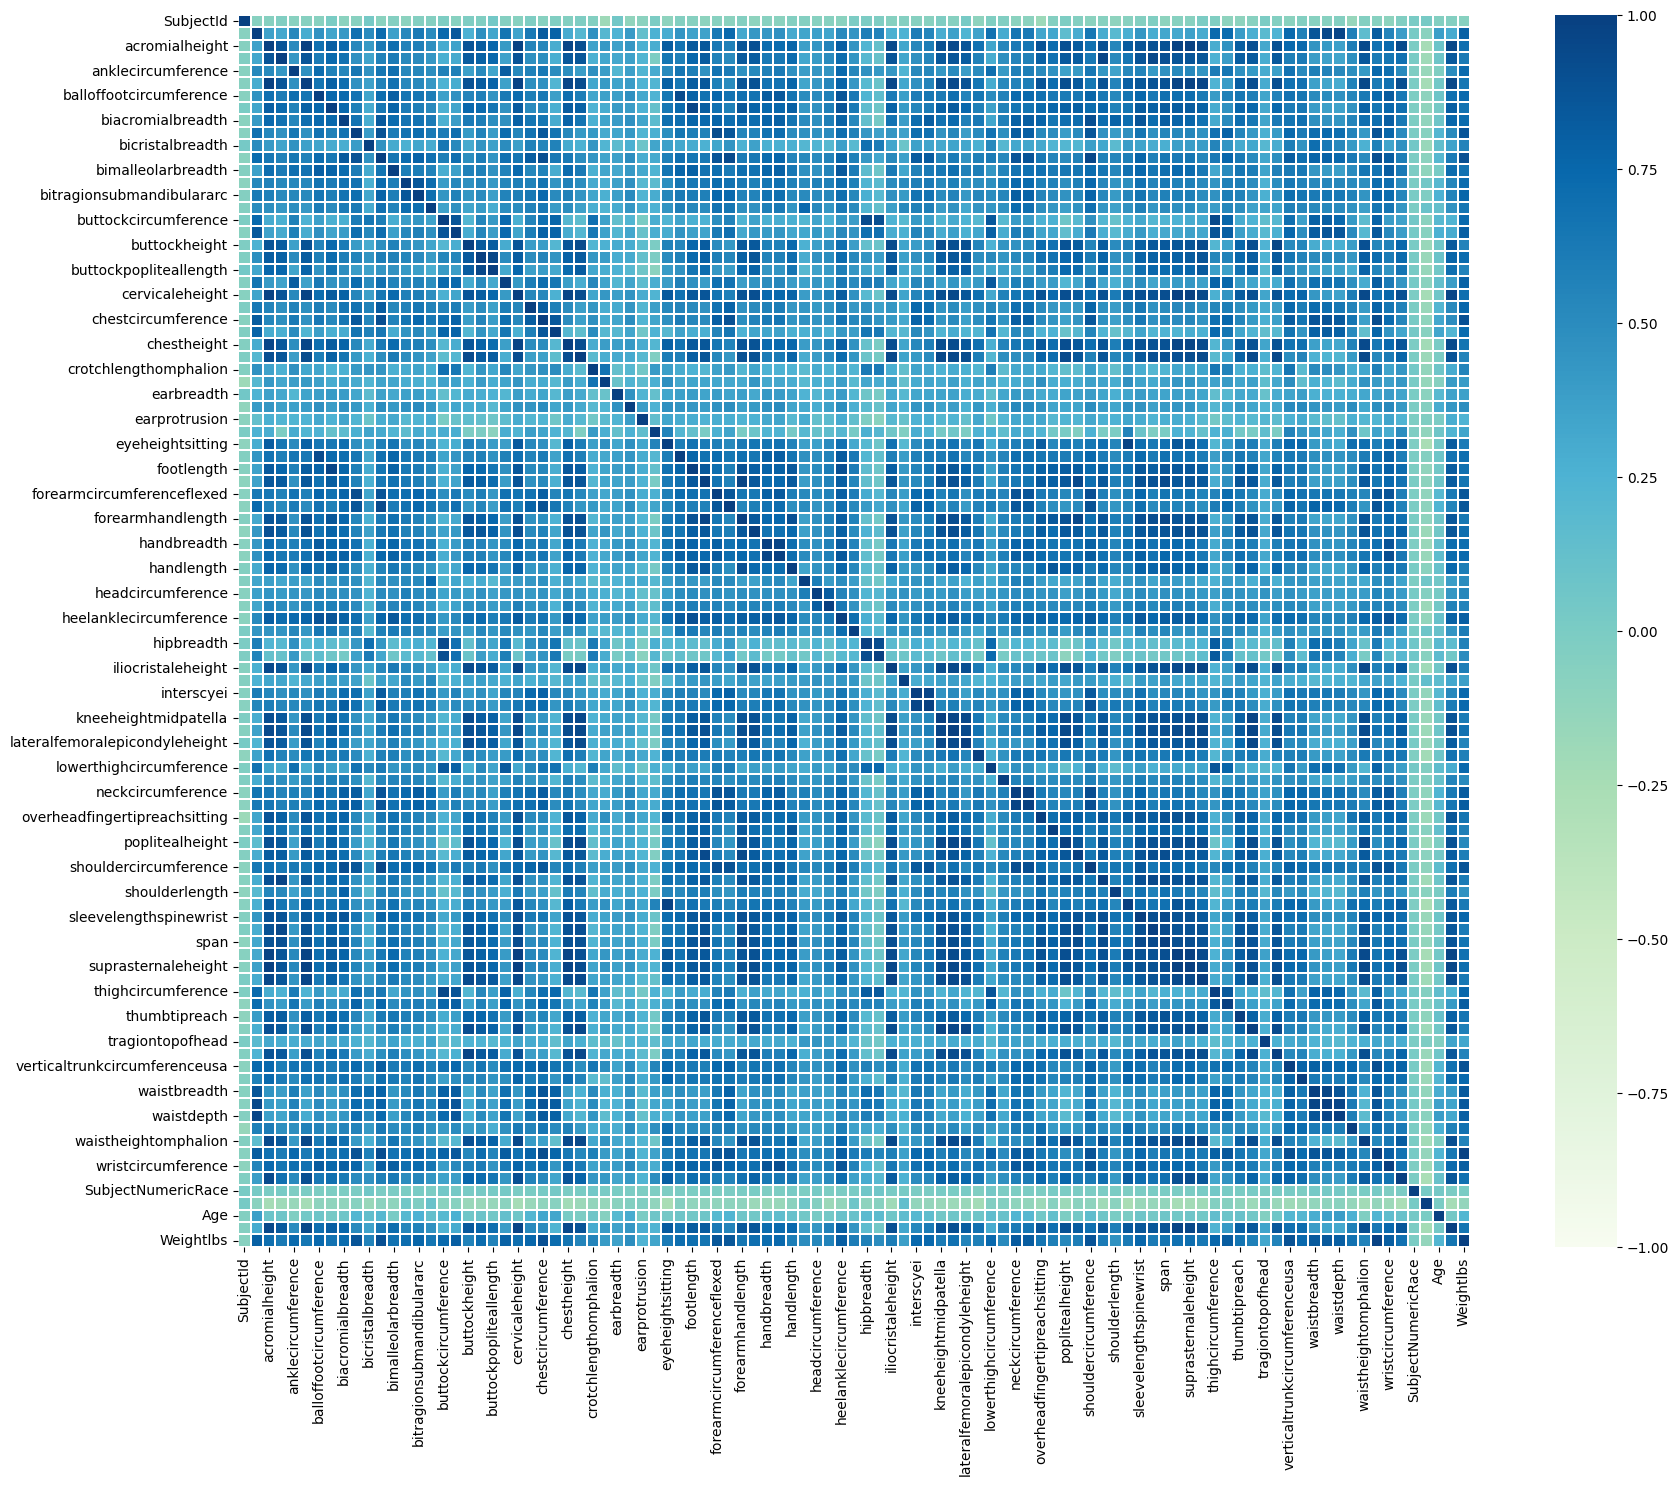

In [109]:
plt.figure(figsize=(22, 16))
sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1,
            vmax= 1,
            cmap= 'GnBu', 
            linewidths=.12, 
            linecolor='white',
            fmt='.2g',
            square=True);

It's hard to visualuze the correlation since we have too many features

In [28]:
correlations = df.corr(numeric_only=True).unstack().sort_values().drop_duplicates()
highest_corr = correlations[correlations > 0.9]
highest_corr

kneeheightmidpatella            chestheight                       0.900121
hipbreadthsitting               buttockcircumference              0.900228
tenthribheight                  Heightin                          0.900742
stature                         poplitealheight                   0.900976
shouldercircumference           biacromialbreadth                 0.901051
poplitealheight                 suprasternaleheight               0.901304
                                tenthribheight                    0.901478
wristcircumference              handcircumference                 0.901539
crotchheight                    acromialheight                    0.901554
weightkg                        verticaltrunkcircumferenceusa     0.901707
kneeheightmidpatella            suprasternaleheight               0.901805
axillaheight                    trochanterionheight               0.902156
functionalleglength             cervicaleheight                   0.902260
cervicaleheight          

In [ ]:
mapping('SubjectNumericRace')

['Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other']

In [ ]:
mapping('DODRace')

['Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other']

In [33]:
schema

,feature,description,type
0,SubjectId,A unique number for each participant measured ...,Demographic data
1,SubjectBirthLocation,Subject Birth Location; a U.S. state or foreig...,Demographic data
2,SubjectNumericRace,Subject Numeric Race; a single or multi-digit ...,Demographic data
3,Ethnicity,self-reported ethnicity (verified through inte...,Demographic data
4,DODRace,Department of Defense Race; a single digit ind...,Demographic data
5,Gender,“Male” or “Female”,Demographic data
6,Age,Participant’s age in years,Demographic data
7,Heightin,"Height in Inches; self-reported, comparable to...",Demographic data
8,Weightlbs,"Weight in Pounds; self-reported, comparable to...",Demographic data
9,WritingPreference,"Writing Preference; “Right hand”, “Left hand”,...",Demographic data


In [34]:
mapping('Weightlbs')

['Weight in Pounds; self-reported, comparable to measured “weightkg”']

In [35]:
mapping('Heightin')

['Height in Inches; self-reported, comparable to measured “stature”']

In [58]:
mapping('PrimaryMOS')

['Primary Military Occupational Specialty']

In [59]:
df['PrimaryMOS'].value_counts()

11B     671
88M     320
92A     288
91B     230
68W     222
92Y     211
42A     201
25U     196
31B     191
25B     176
12B     160
13B     139
35D     131
35M     128
74D     126
19D     123
92G     123
92F     119
25Q     113
35F      82
91D      73
25S      66
25L      62
11C      55
25A      53
19K      50
25N      49
12N      39
13D      39
11A      38
13F      38
91C      38
35G      36
92W      34
94F      33
90A      31
91J      30
91A      30
94E      29
89B      28
36B      27
91H      25
92S      24
21B      24
91L      23
35T      21
68A      20
88N      19
27D      19
11Z      19
68E      18
25W      18
92M      18
12C      17
12W      17
56M      17
15T      16
25P      15
13A      15
70B      15
91X      15
68J      15
35N      15
68K      14
35P      14
31E      14
13R      14
14J      14
66H      14
88Z      13
35L      13
88A      13
15W      13
15P      12
35X      12
25C      12
91E      12
13Z      11
351L     11
31A      11
14Z      10
12R      10
14T      10
14E 

In [ ]:
features_to_drop = [
    'SubjectId', # irrelavant
    'SubjectsBirthLocation', # irrelavant
    'SubjectNumericRace', # redundant
    'Heightin', # redundant
    'Weightlbs',  # redundant
    'Date',  # irrelavant
    'Installation',  # irrelavant
    'Component', # not sure
    'Branch', # not sure
    'PrimaryMOS', # irrelavant
    'WritingPreference', # not sure ?
    ]

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

## Explore Data

<IPython.core.display.Javascript object>

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

### Logistic Model GridsearchCV

## 2. SVC

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___